In [7]:
pip install matplotlib numpy pandas seaborn shap 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 kB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 43.4 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

github_url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
wine_data = pd.read_csv(github_url)
print('Wine Quality Dataset:')
print(wine_data.head())

Wine Quality Dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5 

In [9]:
# Assuming 'wine_data' is your DataFrame
column_name_mapping = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_acidity',
    'citric acid': 'citric_acid',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide',
    'density': 'density',
    'pH': 'pH',
    'sulphates': 'sulphates',
    'alcohol': 'alcohol',
    'quality': 'quality',
}

# Rename the columns
wine_data = wine_data.rename(columns=column_name_mapping)


In [10]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 78.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 43.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import statsmodels.api as sm

# Original formula
original_formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

# Create the original model
original_model = sm.OLS.from_formula(original_formula, data=wine_data).fit()

# Print summaries
original_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.79e-145
Time:                        01:28:08   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

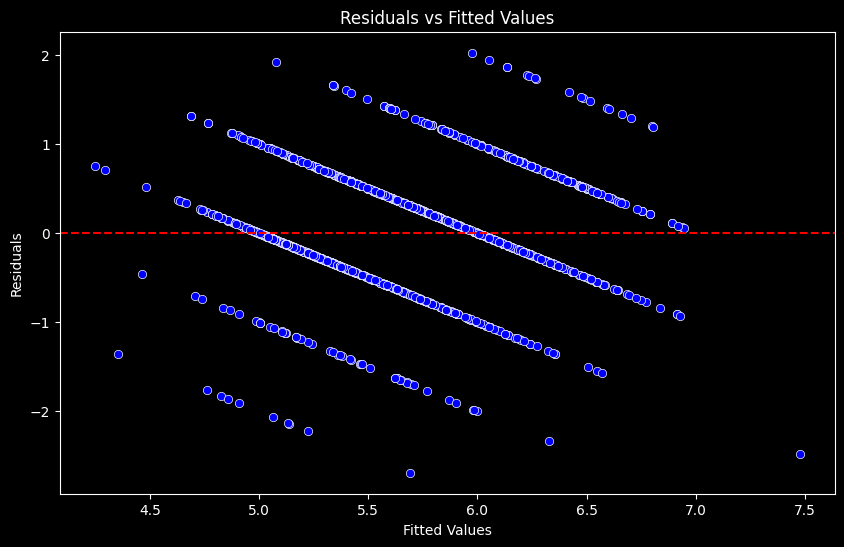

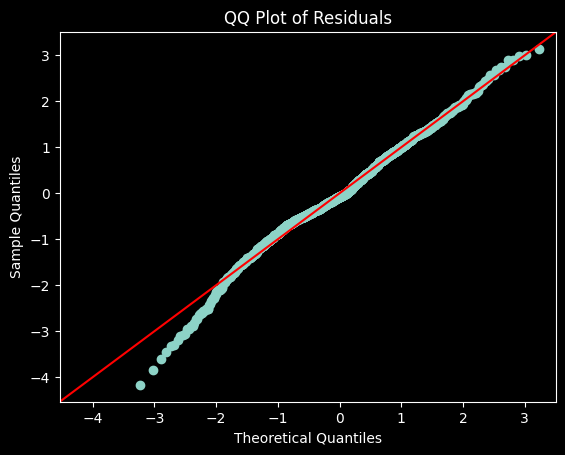

In [169]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Original formula
original_formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'

# Create the original model
original_model = sm.OLS.from_formula(original_formula, data=wine_data).fit()

# Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=original_model.fittedvalues, y=original_model.resid, color='blue')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# QQ Plot (Normality Check)
sm.qqplot(original_model.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

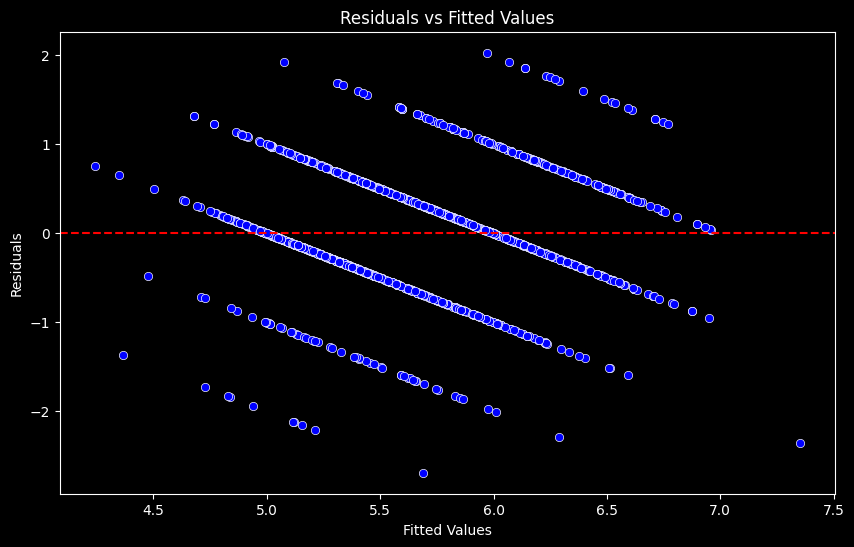

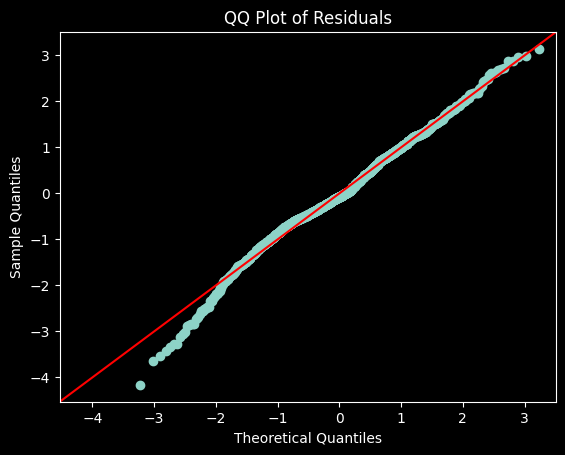

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'wine_data' is a pandas DataFrame with the same structure as in R
# Correct the variable names by enclosing them in backticks
red_model1_formula = 'quality ~ free_sulfur_dioxide + pH + total_sulfur_dioxide + chlorides + sulphates + volatile_acidity + alcohol'
red_model1 = smf.ols(red_model1_formula, data=wine_data).fit()

# Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=red_model1.fittedvalues, y=red_model1.resid, color='blue')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

# QQ Plot (Normality Check)
sm.qqplot(red_model1.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()



In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'wine_data' is a pandas DataFrame with the same structure as in R
# Check the column names in 'wine_data'
print(wine_data.columns)

# Assuming 'wine_data' is a pandas DataFrame with the same structure as in R
# Correct the variable names by enclosing them in backticks
red_model1_formula = 'quality ~ free_sulfur_dioxide + pH + total_sulfur_dioxide + chlorides + sulphates + volatile_acidity + alcohol'
red_model1 = smf.ols(red_model1_formula, data=wine_data).fit()
red_model1.summary()


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          5.32e-149
Time:                        01:28:09   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.4301      0.403     10.995      0.000       3.640       5.220
free_sulfur_dioxide      0.0051      0.002      2.389      0.017       0.001       0.009
pH                      -0.4827      0.118     -4.106      0.000      -0.713      -0.252
total_sulfur_dioxide    -0.0035      0.001     -5.070      0.000      -0.005      -0.002
chlorides               -2.0178      0.398     -5.076      0.000      -2.798      -1.238
sulphates                0.8827      0.110      8.031      0.000       0.667       1.098
volatile_acidity        -1.0128      0.101    -10.043      0.000      -1.211      -0.815
alcohol                  0.2893      0.017     17.225      0.000       0.256       0.322
==============================================================================
Omnibus:                       24.204   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.245
Skew:                          -0.156   Prob(JB):                     2.22e-08
Kurtosis:                       3.657   Cond. No.                     1.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
anova_lm(red_model1, original_model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1591.0,667.537059,0.0,NaN,NaN,NaN
1,1587.0,666.410700,4.0,1.126359,0.670582,0.612412


In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import boxcox

# Assuming redWine is a pandas DataFrame with the necessary columns
# and 'quality' is a column in redWine DataFrame

# Apply Box-Cox transformation to multiple columns
# Since powerTransform is not directly available in Python, we use boxcox from scipy.stats
# Note: boxcox requires positive data for all values
# If any of the columns contain non-positive values, a shift may be necessary

# Define the columns to transform
columns_to_transform = ['free_sulfur_dioxide', 'pH', 'total_sulfur_dioxide',
                        'chlorides', 'sulphates', 'volatile_acidity', 'alcohol']

# Apply Box-Cox transformation to each column and store in a new DataFrame
transformed_data = pd.DataFrame()
for col in columns_to_transform:
    transformed_data[col], _ = boxcox(wine_data[col] + 1)  # Adding 1 to avoid zero or negative values

# Linear regression model
# Prepare the independent variables with transformations
wine_data['log_pH'] = np.log(wine_data['pH'])
wine_data['log_total_sulfur_dioxide'] = np.log(wine_data['total_sulfur_dioxide'])
wine_data['inv_sqrt_chlorides'] = 1 / np.sqrt(wine_data['chlorides'])
wine_data['inv_sulphates'] = 1 / wine_data['sulphates']
wine_data['volatile_acidity_cbrt'] = wine_data['volatile_acidity'] ** (1/3)
wine_data['inv_alcohol_cbrt'] = 1 / (wine_data['alcohol'] ** (1/3))

# Define the dependent variable
wine_data['quality_transformed'] = wine_data['quality'] ** 3.62

# Define the independent variables
X = wine_data[['log_pH', 'log_total_sulfur_dioxide', 'inv_sqrt_chlorides', 'sulphates',
             'inv_sulphates', 'volatile_acidity_cbrt', 'inv_alcohol_cbrt']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(wine_data['quality_transformed'], X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     quality_transformed   R-squared:                       0.378
Model:                             OLS   Adj. R-squared:                  0.376
Method:                  Least Squares   F-statistic:                     138.4
Date:                 Tue, 30 Jan 2024   Prob (F-statistic):          2.35e-159
Time:                         01:28:09   Log-Likelihood:                -11036.
No. Observations:                 1599   AIC:                         2.209e+04
Df Residuals:                     1591   BIC:                         2.213e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     6267.1127    326.168     19.214      0.000    5627.348    6906.877
log_pH                    -762.6941    146.519     -5.205      0.000   -1050.085    -475.303
log_total_sulfur_dioxide   -36.9420      8.887     -4.157      0.000     -54.374     -19.511
inv_sqrt_chlorides          59.1809     12.830      4.613      0.000      34.016      84.345
sulphates                 -382.3325     95.231     -4.015      0.000    -569.125    -195.540
inv_sulphates             -390.0515     49.183     -7.931      0.000    -486.521    -293.582
volatile_acidity_cbrt     -535.2796     74.843     -7.152      0.000    -682.080    -388.479
inv_alcohol_cbrt         -7747.3220    463.260    -16.723      0.000   -8655.987   -6838.657
==============================================================================
Omnibus:                      244.917   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.104
Skew:                           0.876   Prob(JB):                    1.58e-119
Kurtosis:                       5.268   Cond. No.                         499.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

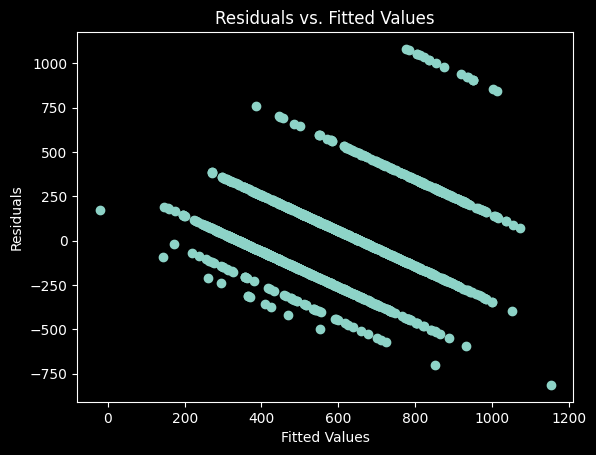

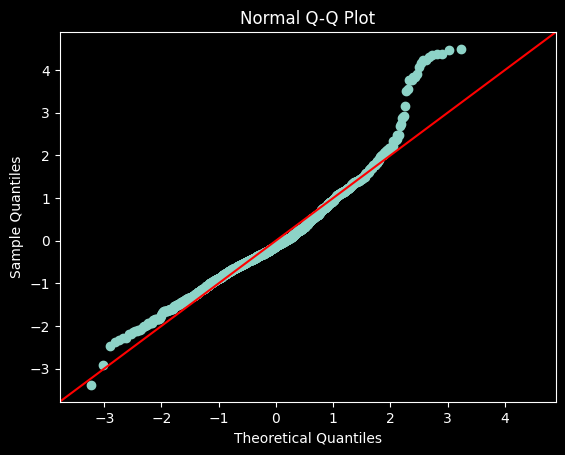

In [22]:
# Residuals vs. Fitted Values Plot
plt.scatter(model.fittedvalues, model.resid)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Normal Q-Q Plot
sm.qqplot(model.resid, line = '45', fit = 'true')
plt.title('Normal Q-Q Plot')
plt.show()

